## Implementación de condiciones de borde no homogéneas - Método SOR

### Método SOR

Para la resolución del problema uitlizaremos el método SOR

$$a_{ij} c_{i+1,j}^\textrm{correcto} + b_{ij} c_{i-1,j}^\textrm{correcto} + c_{ij} c_{i,j+1}^\textrm{correcto} + d_{ij} c_{i,j-1}^\textrm{correcto} + e_{ij} c_{i,j}^\textrm{correcto} - f_{ij} = 0$$

$$a_{ij} c_{i+1,j}^\textrm{estimado} + b_{ij} c_{i-1,j}^\textrm{estimado} + c_{ij} c_{i,j+1}^\textrm{estimado} + d_{ij} c_{i,j-1}^\textrm{estimado} + e_{ij} c_{i,j}^\textrm{estimado} - f_{ij} = \xi_{i,j}$$

$$c_{i,j}^\textrm{correcto} \approx c_{i,j}^\textrm{estimado} -\frac{\xi_{i,j}}{e_{i,j}}$$

$$c_{i,j}^\textrm{nuevo} \approx c_{i,j}^\textrm{antiguo} -\omega\frac{\xi_{i,j}}{e_{i,j}}$$

Coeficientes SOR para nodos interiores del problema de difusión 2-D en un dominio cuadrado. 
$$a_{ij} = b_{ij} =  \frac{D_{AB}}{\Delta x^2} $$

$$c_{ij} = d_{ij} =  \frac{D_{AB}}{\Delta y^2} $$

$$e_{ij} = -\frac{2D_{AB}}{\Delta x^2} -\frac{2D_{AB}}{\Delta y^2} -S$$

$$ f_{ij} = 0 $$

#### Importar módulos

In [1]:
# Mejorar calidad de gráficos en Jupyter Notebook
%matplotlib notebook

# Visualización de datos y gráficos
import matplotlib.pyplot as plt 

# Computación numérica
import numpy as np

#### Inicializar los parámetros constantes del problema

In [2]:

Lr = 2.5
Lz = 2.0

# Difusividad de especie A / m^2 s^-1
D = 2.1e-9
k = 2e-9
c0 = 0.0

#### 2.1: Generar grilla con los puntos en especifico en la coordenada $r$ y $z$

Definimos dos vector en el espacio que define nuestra malla bidimensional en las coordenadas $r$ y $z$.

In [3]:

Nr = 101
Nz = Nr

# Definimos vectores con las coordenadas de cada punto en el espacio donde se evaluará la solución.
r_grilla = np.linspace(0.0, Lr, Nr)
z_grilla = np.linspace(0.0, Lz, Nz)

# Calculamos el paso en espacio en cada coordenada.
dr = Lr/(Nr-1)
dz = Lz/(Nz-1)

print("dr = %.3f m, dz = %.3f m" % (dr, dz))
print(r_grilla)

dr = 0.025 m, dz = 0.020 m
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475
 1.5   1.525 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775
 1.8   1.825 1.85  1.875 1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075
 2.1   2.125 2.15  2.175 2.2   2.225 2.25  2.275 2.3   2.325 2.35  2.375
 2.4   2.425 2.45  2.475 2.5  ]


#### 2.3: Definición de los coeficientes SOR para nodos interiores en el dominio

Notamos que en todos los escenarios, la ecuación diferencial parcial y por ende su discretización.

In [4]:
vz=[1e-11]*21
vz=vz+[-0.25*(1e-11)]*80
len(r_grilla)

101

In [5]:
# Definir valores de coeficientes constantes. Estos son los mismos para los tres casos
a=[1]*len(r_grilla)
b=[1]*len(r_grilla)
c=[1]*len(r_grilla)
d=[1]*len(r_grilla)
e=[1]*len(r_grilla)
f=[1]*len(r_grilla)
# Coeficiente correspondiente a nodo vecino derecho
for i in range(len(r_grilla)):
    a[i] = D/(2*(i+1)*dr**2)+D/dr**2

# Coeficiente correspondiente a nodo vecino izquierdo
for i in range(len(r_grilla)):
    b[i] = -D/(2*(i+1)*dr**2)+D/(dr**2)

# Coeficiente correspondiente a nodo vecino superior
for i in range(len(r_grilla)):
    d[i] = vz[i]/dz+D/dz**2

# Coeficiente correspondiente a nodo vecino inferior
c = D/dz**2

# Coeficiente correspondiente a nodo central
for i in range(len(r_grilla)):
    e[i] = -vz[i]/dz-2*D/dr**2-2*D/dz**2-k

# Coeficiente correspondiente a termino constante
f = 0

#### 2.4: Método de sobre-relajación sucesiva  para la iteración funcional

In [6]:
# Definir valores constantes para parámetros SOR

# Parámetro de sobre-relajación
omega = 1.45

# Tolerancia, criterio de convergencia
tol = 0.0000000001

#### Algortitmo de iteración SOR

In [7]:
# Algoritmo de iteración por SOR

# Inicializamos arreglo para almacenar los valores solución de la concentration de aroma
cA1 = np.ones((Nr,Nz))*c0

# Aplicamos las condiciones de borde 
cA1[0:21,0] = 8

cA1[-1,:] = ( 4*cA1[-2,:] - cA1[-3,:] ) / 3

cA1[:,-1] = ( 4*cA1[:,-2] - cA1[:,-3] ) / 3

# Inicializamos el residuo total al comienzo de iteración con un valor arbitrario
residuo_total = 1000
 
cnt_it = 0

while residuo_total > tol:
    
    residuo_tmp = residuo_total
    resid_total = 0
    cnt_nodos = 0
    # Recorrer puntos internos del dominio
    for i in range(0,Nr):
        for j in range(0,Nz):
            #for l in range(len(r_grilla)):
             #   a[l] = D/(2*(l+1)*dr**2)+D/dr**2
            #for l in range(len(r_grilla)):
            #    b[l] = -D/(2*(l+1)*dr**2)+D/(dr**2)
            #for l in range(len(r_grilla)):
            #    d[l] = vz[l]/dz+D/dz**2
            #c = D/dz**2
            #for l in range(len(r_grilla)):
             #   e[l] = -vz[l]/dz-2*D/dr**2-2*D/dz**2-k
            #f = 0
            
            # Checker-boarding para garantizar convergencia, resolviendo nodos pares e impares alternadamente
            if ((i+j)%2) == cnt_it%2:
                
                # Calcular residuo para nodo (i,j)
                if (i > 0) & (i < Nr-1) & (j > 0) & (j < Nz-1):
                    residuo_nodo = a[i]*cA1[i+1,j] + b[i]*cA1[i-1,j] + c*cA1[i,j+1] + d[i]*cA1[i,j-1] + e[i]*cA1[i,j] - f

                    # Actualizar el valor de concentration de aroma
                    cA1[i,j] += - omega*residuo_nodo / e[i]

                    # Actualizar la suma de residuos absolutos
                    residuo_total += abs(residuo_nodo)
                
                # Aumentar contador de nodos
                cnt_nodos += 1
    
    # Actualizar condiciones de borde arreglo solución de concetraciones 
    # luego de un checker-boarding completo (nodos pares e impares)
    if cnt_it%2 == 0:
        # borde inferior (x, y=0) esto es para todo i en j = 0
        cA1[0:21,0] = 8

        cA1[-1,:] = ( 4*cA1[-2,:] - cA1[-3,:] ) / 3

        cA1[:,-1] = ( 4*cA1[:,-2] - cA1[:,-3] ) / 3
    
    # Calcular residuo medio
    residuo_total = residuo_total/cnt_nodos
        
    # Imprimir residuo cada 100 iteraciones
    if cnt_it%100 == 0:
        print("Residuo total: %.3e "% residuo_total)
    # Aumentar contador de iteraciones
    cnt_it = cnt_it + 1


Residuo total: 1.960e-01 
Residuo total: 1.229e-08 
Residuo total: 6.587e-09 
Residuo total: 4.366e-09 
Residuo total: 3.195e-09 
Residuo total: 2.476e-09 
Residuo total: 1.993e-09 
Residuo total: 1.647e-09 
Residuo total: 1.389e-09 
Residuo total: 1.189e-09 
Residuo total: 1.032e-09 
Residuo total: 9.040e-10 
Residuo total: 7.992e-10 
Residuo total: 7.119e-10 
Residuo total: 6.384e-10 
Residuo total: 5.757e-10 
Residuo total: 5.217e-10 
Residuo total: 4.750e-10 
Residuo total: 4.342e-10 
Residuo total: 3.982e-10 
Residuo total: 3.665e-10 
Residuo total: 3.382e-10 
Residuo total: 3.129e-10 
Residuo total: 2.902e-10 
Residuo total: 2.697e-10 
Residuo total: 2.511e-10 
Residuo total: 2.342e-10 
Residuo total: 2.188e-10 
Residuo total: 2.047e-10 
Residuo total: 1.918e-10 
Residuo total: 1.799e-10 
Residuo total: 1.689e-10 
Residuo total: 1.588e-10 
Residuo total: 1.494e-10 
Residuo total: 1.407e-10 
Residuo total: 1.325e-10 
Residuo total: 1.250e-10 
Residuo total: 1.179e-10 
Residuo tota

<IPython.core.display.Javascript object>


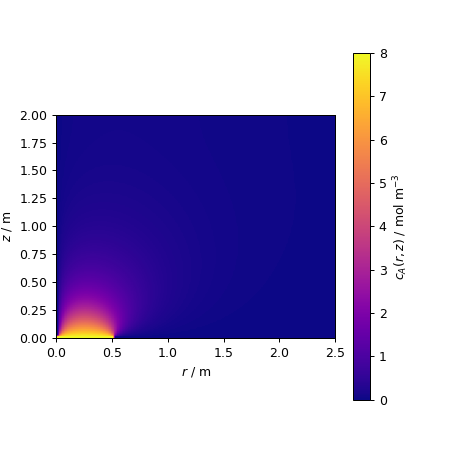

In [8]:

fig = plt.subplots(figsize=[5,5])
plt.imshow(np.flipud(np.transpose(cA1)), origin="upper", extent =[0, Lr,0,Lz], cmap = "plasma")
plt.colorbar(label=r"$c_A(r,z)$ / mol m$^{-3}$")
plt.xlabel(r'$r$ / m')
plt.ylabel(r'$z$ / m')

plt.show()

#### Bibliografía:

1. [Successive over-relaxation method, Primer in Computational Mathematics, Earth Science and Engineering Department, Imperial College London](https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/6_Solving_PDEs_SOR.html)